# Let's Grow More❤️

### Name: Gourav Banerjee
Data Science Intern @ LGMVIP Feb-2022
#### TASK 1 { Beginner Level Task } - Iris Flowers Classification ML Project


Description of Task:
    This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.


Dataset: https://archive.ics.uci.edu/ml/datasets/Iris

## Importing Libraries

In [2]:
import numpy as np                   

import pandas as pd                  

import seaborn as sns  

import matplotlib.pyplot as plt                   

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

%matplotlib inline


## Dataset Description
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

### Attribute Information:

Sepal length in cm
Sepal width in cm
Petal length in cm
Petal width in cm
Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:

1) Iris Setosa
2) Iris Versicolour
3) Iris Virginica
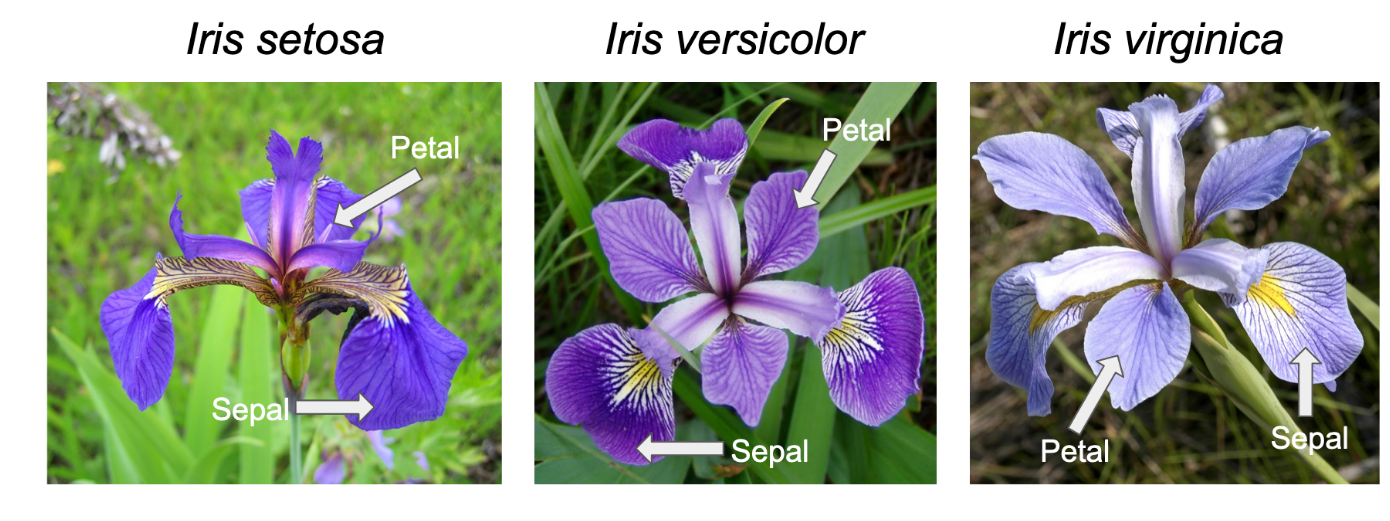

## Importing Dataset

In [3]:
#Reading/Importing dataset
data=pd.read_csv(r'D:\6thSem\Iris.csv')

In [4]:
#Printing first 5 rows of the dataset
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Printing last 5 rows of the dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Data Preprocessing

In [6]:
#Printing the shape of the dataset
data.shape


(150, 6)

In [7]:
#Summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Checking the null values
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
#Returns the number of missing values in the dataset.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Statistical Summary of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Columns of Dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
#To return no, of unique elements in the object
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [13]:
data.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [14]:
data.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [15]:
# To display no. of samples on each class.
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

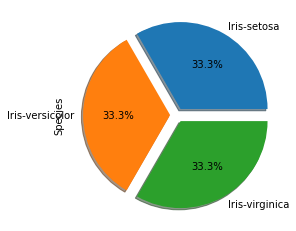

In [16]:
#Pie plot to show the overall types of Iris classifications
data['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

##### Correlation Matrix

In [17]:
data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Heat Map


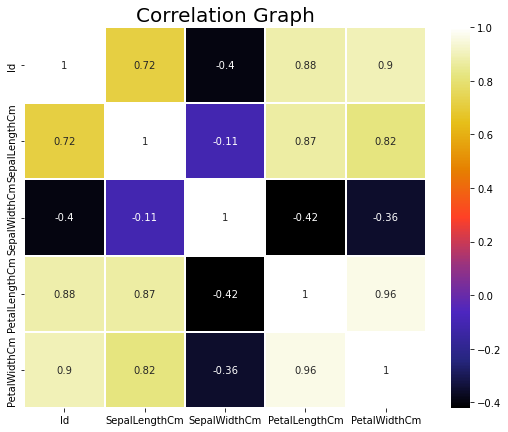

In [18]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

The diagonal values are 1 as expected as they show relation of the feature with itself. Also, there is high positive correlation for Petal width with Sepal length and Petal length. Also, correlation between Petal length and Sepal length is positively high

### Label encoding for categorical variables


In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [21]:
# To display no. of samples on each class.
data['Species'].unique()

array([0, 1, 2])

###  Splitting X and Y into Train and Test datasets

In [22]:
# Splitting dataset 
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data.loc[:, features].values   #defining the feature matrix
Y = data.Species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [23]:
X_Train.shape


(110, 4)

In [24]:
X_Test.shape


(40, 4)

In [25]:
Y_Train.shape


(110,)

In [26]:
Y_Test.shape


(40,)

### Data Scaling


In [27]:
# Feature Scaling to bring all the variables in a single scale.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [28]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

### Model Creation

#### Logistic Regression


In [29]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(random_state = 0)
log_model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [30]:
# model training
log_model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [31]:
# Predicting
Y_Pred_Test_log_res=log_model.predict(X_Test)

In [32]:
Y_Pred_Test_log_res


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [33]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_log_res)*100)


Accuracy: 97.5


In [34]:
print(classification_report(Y_Test, Y_Pred_Test_log_res))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [35]:
confusion_matrix(Y_Test,Y_Pred_Test_log_res )


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#### KNN(K-Nearest Neighbours)


In [36]:
# Importing KNeighborsClassifier from sklearn.neighbors library

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')


In [37]:
# Importing KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [38]:
# model training
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [39]:
# Predicting
Y_Pred_Test_knn=knn_model.predict(X_Test)

In [40]:
Y_Pred_Test_knn


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [41]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_knn)*100)


Accuracy: 97.5


In [42]:
print(classification_report(Y_Test,Y_Pred_Test_knn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [43]:
confusion_matrix(Y_Test, Y_Pred_Test_knn)


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#### Decision Tree


In [44]:
# Importing DecisionTreeClassifier from sklearn.tree library and creating an object of it  with hyper parameters criterion,splitter and max_depth.

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

In [45]:
# model training
dec_tree.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [46]:
# Predicting
Y_Pred_Test_dtr=dec_tree.predict(X_Test)

In [47]:
Y_Pred_Test_dtr


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [48]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100)


Accuracy: 97.5


In [49]:
print(classification_report(Y_Test, Y_Pred_Test_dtr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [50]:
confusion_matrix(Y_Test, Y_Pred_Test_dtr)


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#### Naive Bayes


In [51]:
from sklearn.naive_bayes import GaussianNB
nav_byes = GaussianNB()


In [52]:
# model training
nav_byes.fit(X_Train, Y_Train)

GaussianNB()

In [53]:
# Predicting
Y_Pred_Test_nvb=nav_byes.predict(X_Test)

In [54]:
Y_Pred_Test_nvb


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [55]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)


Accuracy: 100.0


In [56]:
print(classification_report(Y_Test, Y_Pred_Test_nvb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [57]:
confusion_matrix(Y_Test,Y_Pred_Test_nvb )


array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]], dtype=int64)

#### Random Forest Classification


In [58]:
from sklearn.ensemble import RandomForestClassifier
Ran_for = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')


In [59]:
# model training
Ran_for.fit(X_Train, Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [60]:
# Predicting
Y_Pred_Test_rf=Ran_for.predict(X_Test)

In [61]:
Y_Pred_Test_rf


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [62]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_rf)*100)


Accuracy: 97.5


In [63]:
print(classification_report(Y_Test, Y_Pred_Test_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [64]:
confusion_matrix(Y_Test,Y_Pred_Test_rf )


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#### SVM


In [65]:
# Importing SVC from sklearn.svm library

from sklearn.svm import SVC
svm_model=SVC(C=500, kernel='rbf')

In [66]:
# model training
svm_model.fit(X_Train, Y_Train)

SVC(C=500)

In [67]:
# Predicting
Y_Pred_Test_svm=svm_model.predict(X_Test)

In [68]:
Y_Pred_Test_svm


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [69]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_svm)*100)


Accuracy: 97.5


In [70]:
print(classification_report(Y_Test, Y_Pred_Test_svm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [71]:
confusion_matrix(Y_Test,Y_Pred_Test_svm )


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

### Model Evaluation Results

Model - 	                    Accuracy Score

Logistic Regression - 	        97.5

KNN(K-Nearest Neighbours) - 	97.5

Decision Tree - 	            97.5

Naive Bayes - 	                100.0

Random Forest - 	            97.5

SVM - 	                        97.5

We got highest accuracy Score of 100 for Naive Bayes



### 11. Conclusions

​ Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.

​ PetalWidthCm was highly correlated with PetalLengthCm

​ PetalLengthCm was highly correlated with PetalWidthCm

​ We tried with 6 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:
    a) Iris Setosa
    b) Iris Versicolour
    c) Iris Virginica,
based on the length and width of the flower's Petals and Sepals.

​ We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN and SVM with Linear Kernel models with some hyper parameter tuning maybe due to small size of dataset.

## THANK YOU